In [1]:
import pyrootutils
from pathlib import Path

# Point to your repo root manually
root = pyrootutils.setup_root(
    Path().resolve().parent,  # current working dir
    project_root_env_var=True,
    dotenv=True,
    pythonpath=True,
    cwd=False,
)

In [2]:
!pip install pandas openpyxl tabulate

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
file_path = "Baseline runs (no synthetic data) (1).xlsx"
baseline_runs_df = pd.read_excel(file_path, engine="openpyxl")
# rename va/balanced_acc to val/balanced_acc
baseline_runs_df.rename(columns={"va/balanced_acc": "val/balanced_acc"}, inplace=True)
baseline_runs_df.rename(columns={"test/specificify": "test/specificity"}, inplace=True)
baseline_runs_df.head()

,Run Type,run_id,model,val/f1,val/specificity,val/rec,val/balanced_acc,test/f1,test/specificity,test/rec,test/balanced_acc
0,Densenet baseline (no synthetic data),hxgjenmk,densenet201,0.848485,0.357143,0.965517,0.661330,0.835821,0.333333,0.965517,0.649425
1,ISIC2019 baseline (no synthetic data),lzh6cqwh,isic2019_effnetb6,0.830769,0.357143,0.931035,0.644089,0.805556,0.066667,1.000000,0.533333


In [5]:
file_path = "Synthetic data runs (1).xlsx"
synthetic_runs_df = pd.read_excel(file_path, engine="openpyxl")
# fix typo in test/specificify
synthetic_runs_df.rename(columns={"test/specificify": "test/specificity"}, inplace=True)
synthetic_runs_df.rename(columns={"val/specificify": "val/specificity"}, inplace=True)

# add val/balanced_acc and test/balanced_acc if missing
if "val/balanced_acc" not in synthetic_runs_df.columns:
    synthetic_runs_df["val/balanced_acc"] = (
        synthetic_runs_df["val/rec"] + synthetic_runs_df["val/specificity"]
    ) / 2

synthetic_runs_df.head()

,Dataset,SAM_mean,SAM_std,RASE_mean,RASE_std,PSNR_mean,PSNR_std,SSIM_mean,SSIM_std,TV_mean,...,best_step,val/f1,val/specificity,val/rec,va/balanced_acc,test/f1,test/specificity,test/rec,test/balanced_acc,val/balanced_acc
0,hsi_dermoscopy_croppedv2_256_synth_fsgan,0.244278,0.043153,4060.050110,772.176355,13.928331,1.239069,0.642179,0.042221,69095.78027,...,134.0,0.862069,0.714286,0.862069,0.788177,0.843750,0.466667,0.931035,0.698851,0.788177
1,hsi_dermoscopy_croppedv2_256_synth_fsgan_pretr...,0.225471,0.039058,3314.361487,481.032029,12.872177,1.507934,0.651518,0.038814,69787.14180,...,20.0,0.821429,0.714286,0.793103,0.753695,0.781250,0.333333,0.862069,0.597701,0.753695
2,hsi_dermoscopy_croppedv2_256_synth_spade_fsgan,0.253011,0.031637,4272.189270,448.691614,12.813588,1.959416,0.666892,0.041194,54943.26221,...,16.0,0.900000,0.714286,0.931035,0.822660,0.830769,0.400000,0.931035,0.665517,0.822660
3,hsi_dermoscopy_croppedv2_256_synth_spade_fsgan...,0.219326,0.030917,3386.864723,704.884678,12.869754,2.391343,0.662298,0.042146,69771.11328,...,18.0,0.881356,0.714286,0.896552,0.805419,0.830769,0.400000,0.931035,0.665517,0.805419
4,hsi_dermoscopy_croppedv2_256_synth_ac_cyclegan,0.186673,0.056201,4033.053118,1098.594013,14.510313,1.269291,0.639081,0.028402,170068.16880,...,16.0,0.852459,0.571429,0.896552,0.733990,0.838710,0.533333,0.896552,0.714943,0.733990


In [6]:
from tabulate import tabulate

k = 5

# Drop rows with missing test/f1 values
synthetic_runs_clean = synthetic_runs_df.dropna(subset=["test/f1"])

# Select top-k by test/f1
top_k_runs = synthetic_runs_clean.sort_values(by="test/f1", ascending=False).head(k)

# Then sort those by test/balanced_acc for ordering
top_k_runs = top_k_runs.sort_values(by="test/balanced_acc", ascending=False).reset_index(drop=True)

# Select key test metrics to display
cols = [
    "run_id",
    "test/f1",
    "test/rec",
    "test/specificity",
    "test/balanced_acc",
]

# Pretty print the final table
print(
    tabulate(
        top_k_runs[cols],
        headers="keys",
        tablefmt="fancy_grid",
        floatfmt=".4f",
        showindex=False,
    )
)

╒══════════╤═══════════╤════════════╤════════════════════╤═════════════════════╕
│ run_id   │   test/f1 │   test/rec │   test/specificity │   test/balanced_acc │
╞══════════╪═══════════╪════════════╪════════════════════╪═════════════════════╡
│ rpxuujz1 │    0.8772 │     0.9259 │             0.6154 │              0.7707 │
├──────────┼───────────┼────────────┼────────────────────┼─────────────────────┤
│ j6kdgk6h │    0.8387 │     0.8966 │             0.5333 │              0.7149 │
├──────────┼───────────┼────────────┼────────────────────┼─────────────────────┤
│ w2yjc957 │    0.8438 │     0.9310 │             0.4667 │              0.6989 │
├──────────┼───────────┼────────────┼────────────────────┼─────────────────────┤
│ y981mzsk │    0.8308 │     0.9310 │             0.4000 │              0.6655 │
├──────────┼───────────┼────────────┼────────────────────┼─────────────────────┤
│ sib24cd6 │    0.8308 │     0.9310 │             0.4000 │              0.6655 │
╘══════════╧═══════════╧════

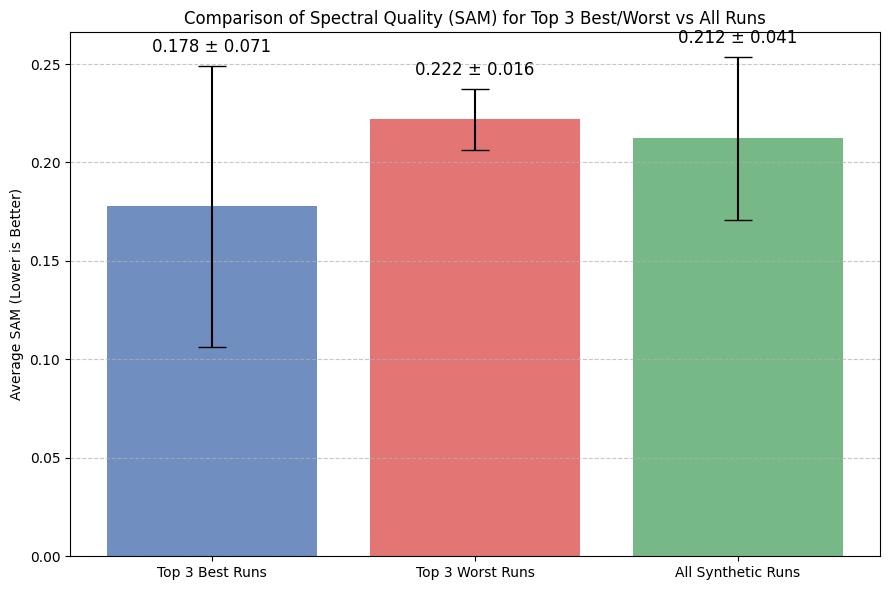

In [7]:
# Reload data just in case (though context preserves it, good practice for standalone snippets)
synthetic_runs_clean = synthetic_runs_df.dropna(subset=["test/f1"])

# Identify top k best and worst runs based on 'test/f1'
k = 3
top_k_runs = synthetic_runs_clean.sort_values(by="test/f1", ascending=False).head(k)
worst_k_runs = synthetic_runs_clean.sort_values(by="test/f1", ascending=True).head(k)

# Calculate statistics for Top k (best)
top_k_mean = top_k_runs["SAM_mean"].mean()
top_k_std = top_k_runs["SAM_mean"].std()

# Calculate statistics for Worst k
worst_k_mean = worst_k_runs["SAM_mean"].mean()
worst_k_std = worst_k_runs["SAM_mean"].std()

# Calculate statistics for All Runs
all_runs_mean = synthetic_runs_clean["SAM_mean"].mean()
all_runs_std = synthetic_runs_clean["SAM_mean"].std()

# Data for plotting
categories = [f"Top {k} Best Runs", f"Top {k} Worst Runs", "All Synthetic Runs"]
means = [top_k_mean, worst_k_mean, all_runs_mean]
stds = [top_k_std, worst_k_std, all_runs_std]
colors = ["#4c72b0", "#dd5252", "#55a868"]

# Plotting
plt.figure(figsize=(9, 6))
bars = plt.bar(categories, means, yerr=stds, capsize=10, color=colors, alpha=0.8)

# Add labels and title
plt.ylabel("Average SAM (Lower is Better)")
plt.title(f"Comparison of Spectral Quality (SAM) for Top {k} Best/Worst vs All Runs")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add text labels for the values
for bar, mean, std in zip(bars, means, stds):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        mean + std + 0.005,
        f"{mean:.3f} ± {std:.3f}",
        ha="center",
        va="bottom",
        fontsize=12,
    )

plt.tight_layout()

DenseNet Baseline: [0.84848487 0.35714287 0.96551722 0.66133004]
DenseNet Best: [0.88524592 0.4629629  1.         0.73148145]
EffNet Baseline: [0.83076924 0.35714287 0.93103451 0.64408869]
EffNet Best: [0.85245901 0.5714286  0.89655173 0.73399016]


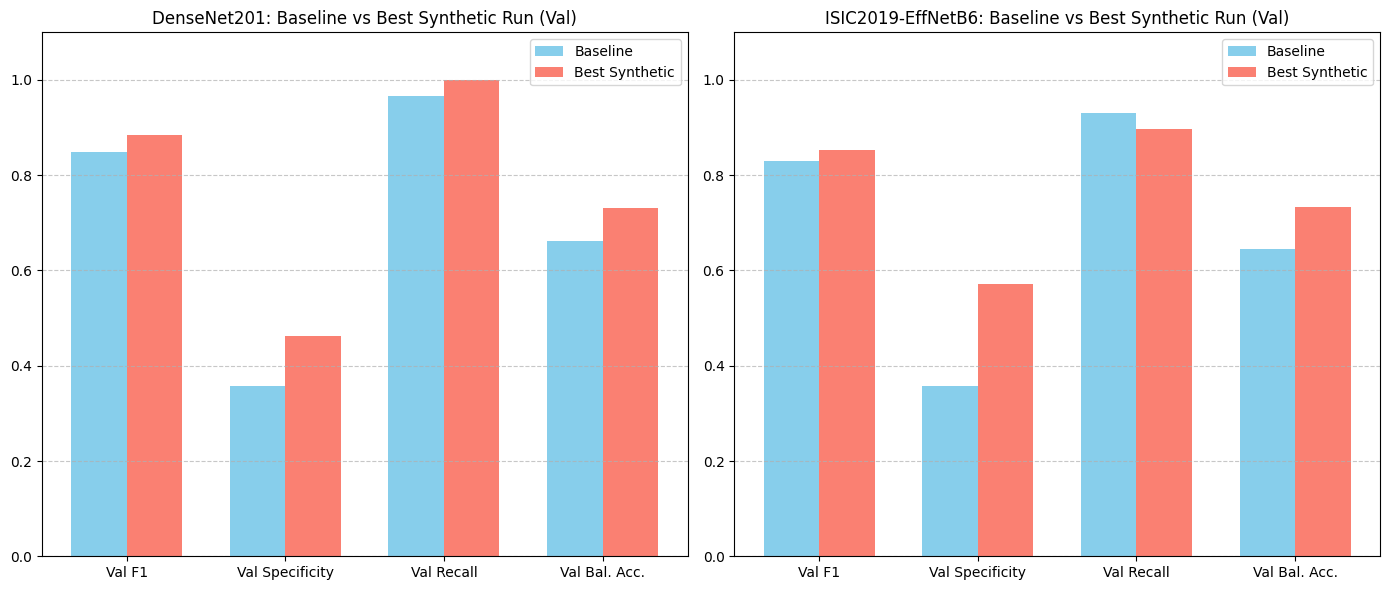

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
models = ['DenseNet201', 'EfficientNetB6']
data_split = 'val'
metrics = [f'{data_split.capitalize()} F1', f'{data_split.capitalize()} Specificity', f'{data_split.capitalize()} Recall', f'{data_split.capitalize()} Bal. Acc.']

# Extracting values
# Densenet
df = pd.concat([baseline_runs_df, synthetic_runs_df], ignore_index=True)
dense_base = df[df['run_id'] == 'hxgjenmk'][[f'{data_split}/f1', f'{data_split}/specificity', f'{data_split}/rec', f'{data_split}/balanced_acc']].values.flatten()
dense_best = df[df['run_id'] == 'rpxuujz1'][[f'{data_split}/f1', f'{data_split}/specificity', f'{data_split}/rec', f'{data_split}/balanced_acc']].values.flatten()

# Effnet
eff_base = df[df['run_id'] == 'lzh6cqwh'][[f'{data_split}/f1', f'{data_split}/specificity', f'{data_split}/rec', f'{data_split}/balanced_acc']].values.flatten()
eff_best = df[df['run_id'] == 'j6kdgk6h'][[f'{data_split}/f1', f'{data_split}/specificity', f'{data_split}/rec', f'{data_split}/balanced_acc']].values.flatten()

x = np.arange(len(metrics))
width = 0.35

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot Densenet
axs[0].bar(x - width/2, dense_base, width, label='Baseline', color='skyblue')
axs[0].bar(x + width/2, dense_best, width, label='Best Synthetic', color='salmon')
axs[0].set_title(f'DenseNet201: Baseline vs Best Synthetic Run ({data_split.capitalize()})')
axs[0].set_xticks(x)
axs[0].set_xticklabels(metrics)
axs[0].set_ylim(0, 1.1)
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot EffNet
axs[1].bar(x - width/2, eff_base, width, label='Baseline', color='skyblue')
axs[1].bar(x + width/2, eff_best, width, label='Best Synthetic', color='salmon')
axs[1].set_title(f'ISIC2019-EffNetB6: Baseline vs Best Synthetic Run ({data_split.capitalize()})')
axs[1].set_xticks(x)
axs[1].set_xticklabels(metrics)
axs[1].set_ylim(0, 1.1)
axs[1].legend()
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Print the values for confirmation in the text response
print("DenseNet Baseline:", dense_base)
print("DenseNet Best:", dense_best)
print("EffNet Baseline:", eff_base)
print("EffNet Best:", eff_best)

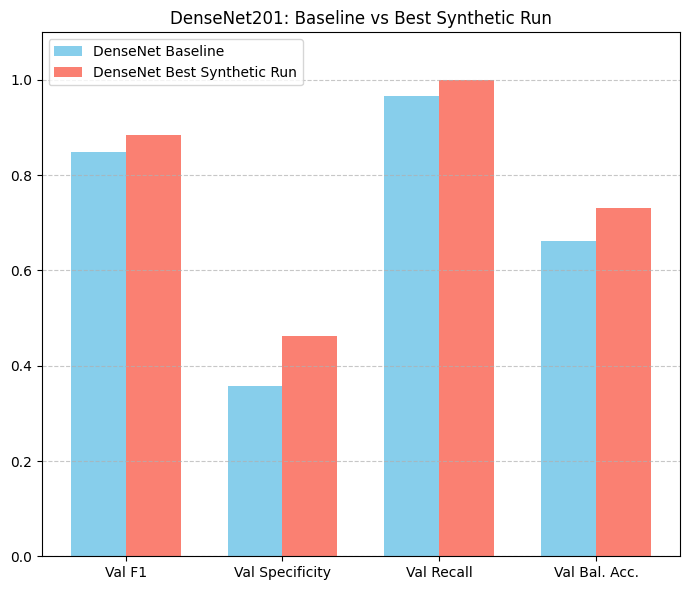

In [9]:
# plot another figure with just the best run with its respective baseline

fig, ax = plt.subplots(figsize=(7, 6))
# Plot Densenet
x = np.arange(len(metrics))
width = 0.35
ax.bar(x - width/2, dense_base, width, label='DenseNet Baseline', color='skyblue')
ax.bar(x + width/2, dense_best, width, label='DenseNet Best Synthetic Run', color='salmon')
ax.set_title('DenseNet201: Baseline vs Best Synthetic Run')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

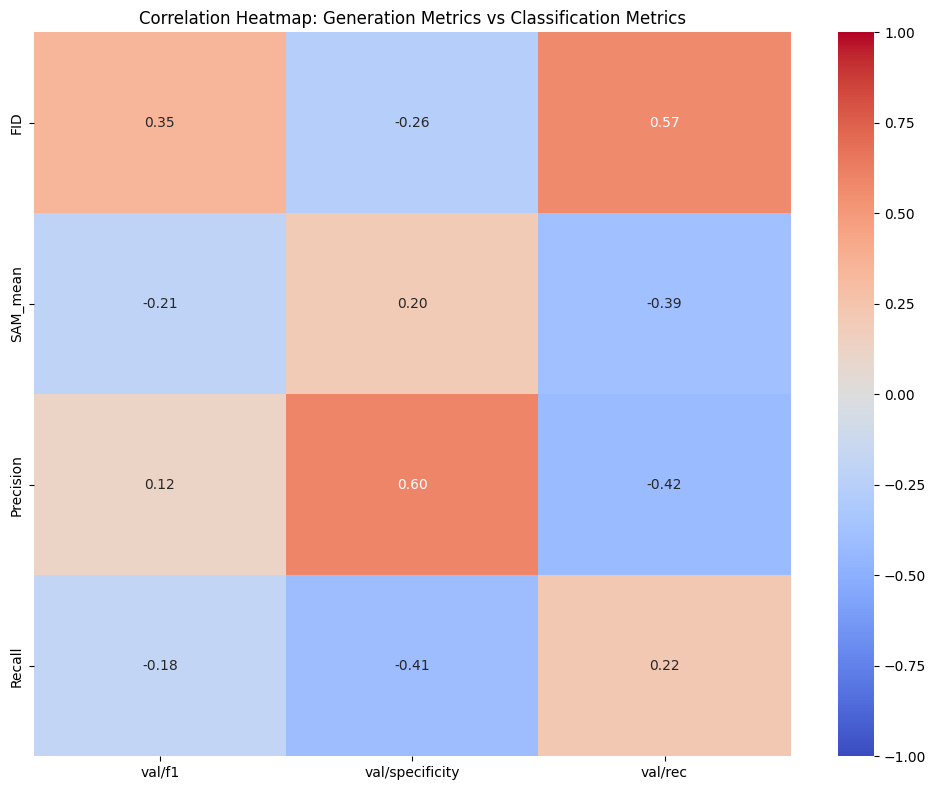

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for rows with classification results
split = 'val'
synthetic_runs_clean = synthetic_runs_df.dropna(subset=[f'{split}/f1'])

# Define metrics
gen_metrics = ['FID', 'SAM_mean', 'Precision', 'Recall']
class_metrics = [f'{split}/f1', f'{split}/specificity', f'{split}/rec']

# Calculate correlation matrix
# We only want the correlation between gen_metrics and class_metrics, 
# not within gen_metrics or within class_metrics for the heatmap (though the full matrix computes it all)
corr_matrix = synthetic_runs_clean[gen_metrics + class_metrics].corr()

# Slice the matrix to show only Gen vs Class correlations
gen_class_corr = corr_matrix.loc[gen_metrics, class_metrics]

# Plot 1: Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(gen_class_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title('Correlation Heatmap: Generation Metrics vs Classification Metrics')
plt.tight_layout()


In [11]:

import pandas as pd

# --- existing code ---
densenet201_isic2019_runs_df = pd.read_excel(
    "densenet_isic2019_runs.xlsx", engine="openpyxl"
)

ana_runs_df = pd.read_csv('ana_synth_runs.csv', sep=' ', decimal=',')

# concat ana_runs_df to densenet201_isic2019_runs_df
densenet201_isic2019_runs_df = pd.concat([densenet201_isic2019_runs_df, ana_runs_df], ignore_index=True)

# drop duplicate run_ids if any
densenet201_isic2019_runs_df = densenet201_isic2019_runs_df.drop_duplicates(subset=['run_id'])

# Extract features from run_name
densenet201_isic2019_runs_df["synthetic"] = densenet201_isic2019_runs_df[
    "run_name"
].apply(lambda x: "synth" in x)
densenet201_isic2019_runs_df["frozen_backbone"] = densenet201_isic2019_runs_df[
    "run_name"
].apply(lambda x: "_fb" in x)
densenet201_isic2019_runs_df["data_augmentation"] = (
    densenet201_isic2019_runs_df["run_name"].apply(lambda x: "_aug" in x)
)
densenet201_isic2019_runs_df["cropped"] = densenet201_isic2019_runs_df[
    "run_name"
].apply(lambda x: "_crop" in x)
densenet201_isic2019_runs_df["model_type"] = densenet201_isic2019_runs_df[
    "run_name"
].apply(
    lambda x: "densenet201"
    if "densenet201" in x
    else ("isic2019" if "isic2019" in x else "unknown")
)

# add val/balance_acc column, which is the average of val/specificity and val/recall
densenet201_isic2019_runs_df["val/balanced_acc"] = (
    densenet201_isic2019_runs_df["val/specificity"]
    + densenet201_isic2019_runs_df["val/rec"]
) / 2

# Keep only cropped runs
densenet201_isic2019_runs_df = densenet201_isic2019_runs_df[
    densenet201_isic2019_runs_df["cropped"] == True
]

In [12]:
# use wandb api to get the synthetic_data_dir key in the config of each run, given their run_id

from wandb import Api
api = Api()
entity = "k298976-unicamp"
project = "hypersynth"

# only run if synthetic_data_dir column does not exist
if 'synthetic_data_dir' not in densenet201_isic2019_runs_df.columns:
    synthetic_data_dirs = []
    for run_id in densenet201_isic2019_runs_df['run_id']:
        run = api.run(f"{entity}/{project}/{run_id}")
        synthetic_data_dir = run.config.get('synthetic_data_dir', 'N/A')
        synthetic_data_dirs.append(synthetic_data_dir)
        
    densenet201_isic2019_runs_df['synthetic_data_dir'] = synthetic_data_dirs
    # move synthetic_data_dir column to be after run_name
    cols = densenet201_isic2019_runs_df.columns.tolist()
    cols.insert(1, cols.pop(cols.index('synthetic_data_dir')))
    densenet201_isic2019_runs_df = densenet201_isic2019_runs_df[cols]

In [13]:
# add "gen_model_type" column based on synthetic_data_dir
# if cyclegan in synthetic_data_dir -> gen_model_type = "cyclegan"
# if ac_cyclegan in synthetic_data_dir -> gen_model_type = "ac_cyclegan"
# if vae in synthetic_data_dir -> gen_model_type = "vae"
# if spade_fastgan or spade_fsgan in synthetic_data_dir -> gen_model_type = "spade_fastgan"
#   elif fastgan or fsgan in synthetic_data_dir -> gen_model_type = "fastgan"
# else (if not none) -> gen_model_type = "fastgan"
# else (if none) -> gen_model_type = None

# only apply to rows that contain synthetic_data_dir 

def get_gen_model_type(synthetic_data_dir):
    if pd.isna(synthetic_data_dir) or synthetic_data_dir == 'N/A':
        return None
    elif "cyclegan" in synthetic_data_dir and "ac_cyclegan" in synthetic_data_dir:
        return "ac_cyclegan"
    elif "cyclegan" in synthetic_data_dir:
        return "cyclegan"
    elif "vae" in synthetic_data_dir:
        return "vae"
    elif "spade_fastgan" in synthetic_data_dir or "spade_fsgan" in synthetic_data_dir:
        return "spade_fastgan"
    elif "fastgan" in synthetic_data_dir or "fsgan" in synthetic_data_dir:
        return "fastgan"
    else:
        return "fastgan"

densenet201_isic2019_runs_df['gen_model_type'] = densenet201_isic2019_runs_df['synthetic_data_dir'].apply(get_gen_model_type)
densenet201_isic2019_runs_df.head()

,run_id,synthetic_data_dir,run_name,best_step,val/f1,val/specificity,val/rec,synthetic,frozen_backbone,data_augmentation,cropped,model_type,val/balanced_acc,gen_model_type
84,klw4lgcf,data/hsi_dermoscopy_croppedv2_256_synth_cyclegan,cyclegan_train_densenet201_pt_fb_hsi_crop_cls_...,78,0.813559,0.571429,0.827586,True,True,True,True,densenet201,0.699507,cyclegan
85,2h8gxe3n,data/hsi_dermoscopy_croppedv2_256_synth_cyclegan,train_densenet201_pt_fb_hsi_crop_cls_synth_aug...,4,0.764706,0.071429,0.896552,True,True,True,True,densenet201,0.483990,cyclegan
86,0mqkwqzl,data/hsi_dermoscopy_croppedv2_256_synth_spade_...,spade_fastgan_train_densenet201_pt_fb_hsi_crop...,24,0.825397,0.428571,0.896552,True,True,True,True,densenet201,0.662562,spade_fastgan
87,0zhezrp0,data/hsi_dermoscopy_croppedv2_256_synth_fsgan,train_densenet201_pt_fb_hsi_crop_cls_synth_aug...,244,0.830769,0.357143,0.931035,True,True,True,True,densenet201,0.644089,fastgan
88,crrof3ka,data/hsi_dermoscopy_croppedv2_256_synth_ac_cyc...,ac_cyclegan_train_densenet201_pt_fb_hsi_crop_s...,264,0.848485,0.357143,0.965517,True,True,True,True,densenet201,0.661330,ac_cyclegan



=== Best Synthetic Runs vs. Baseline ===
gen_model_type  val/f1  val/specificity  val/rec  val/balanced_acc
      cyclegan  0.8571           0.7857   0.8276            0.8067
 spade_fastgan  0.9000           0.7143   0.9310            0.8227
       fastgan  0.9000           0.7143   0.9310            0.8227
      Baseline  0.8571           0.7857   0.8276            0.8067


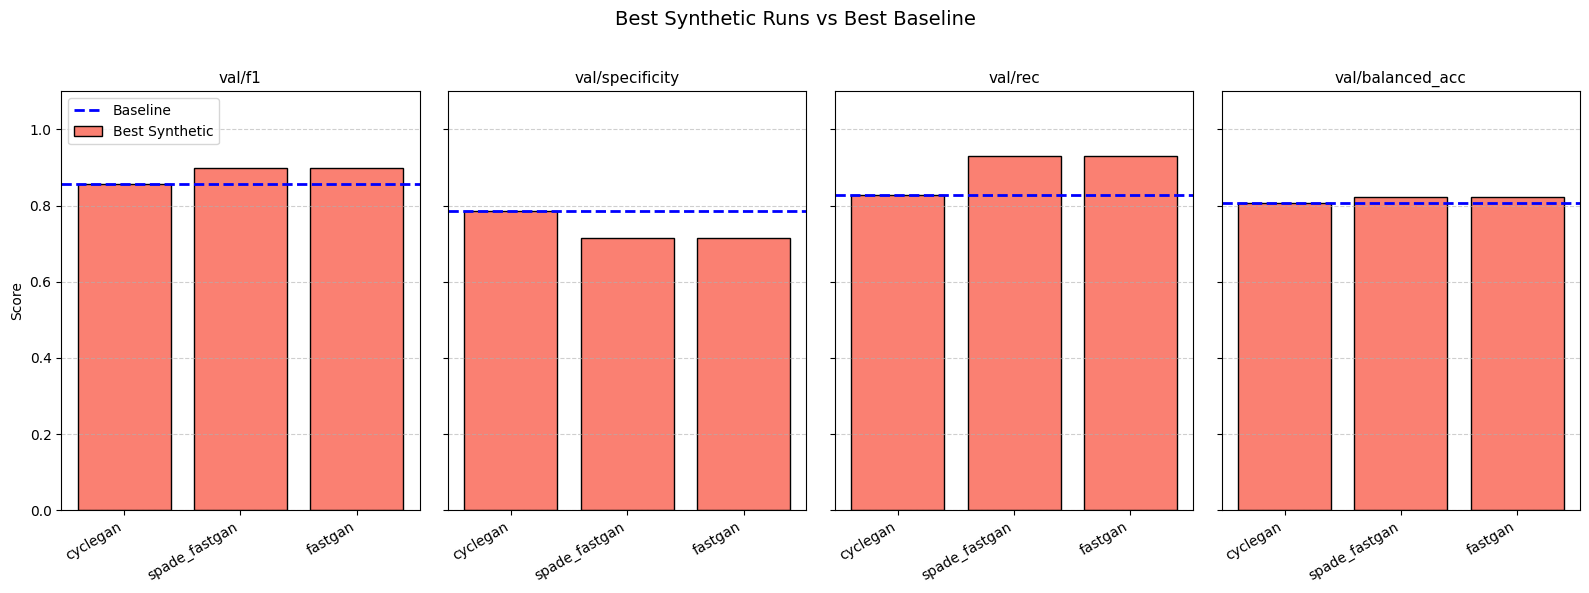

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filter baseline and find best baseline
baseline_runs = densenet201_isic2019_runs_df[
    densenet201_isic2019_runs_df['synthetic'] == False
]
best_baseline_run = baseline_runs.loc[
    baseline_runs['val/balanced_acc'].idxmax()
]

gen_model_types = (
    densenet201_isic2019_runs_df['gen_model_type'].dropna().unique()
)

# remove ac_cyclegan from gen_model_types if present
gen_model_types = [gmt for gmt in gen_model_types if gmt not in ['ac_cyclegan', 'vae']]

metrics = ['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']

# Collect data
data = []
for gen_model_type in gen_model_types:
    synthetic_runs = densenet201_isic2019_runs_df[
        (densenet201_isic2019_runs_df['synthetic'] == True)
        & (densenet201_isic2019_runs_df['gen_model_type'] == gen_model_type)
    ]
    if synthetic_runs.empty:
        print(f"No synthetic runs found for gen_model_type: {gen_model_type}")
        continue

    best_synth = synthetic_runs.loc[
        synthetic_runs['val/balanced_acc'].idxmax()
    ]
    data.append((gen_model_type, best_synth[metrics].values))

# --- Create a DataFrame ---
comparison_df = pd.DataFrame(
    [
        {'gen_model_type': d[0], **dict(zip(metrics, d[1]))}
        for d in data
    ]
)

# Add baseline values as a reference row
baseline_row = {
    'gen_model_type': 'Baseline',
    **{metric: best_baseline_run[metric] for metric in metrics},
}
comparison_df = pd.concat(
    [comparison_df, pd.DataFrame([baseline_row])],
    ignore_index=True
)

# Print table nicely
print("\n=== Best Synthetic Runs vs. Baseline ===")
print(comparison_df.round(4).to_string(index=False))

# --- Plot (unchanged) ---
fig, axes = plt.subplots(
    1, len(metrics), figsize=(4 * len(metrics), 6), sharey=True
)

x = np.arange(len(data))
for i, metric in enumerate(metrics):
    ax = axes[i]
    synth_vals = [vals[i] for _, vals in data]
    baseline_val = best_baseline_run[metric]

    ax.bar(
        x,
        synth_vals,
        color='salmon',
        edgecolor='black',
        label='Best Synthetic',
    )
    ax.axhline(
        baseline_val,
        color='blue',
        linestyle='--',
        linewidth=2,
        label='Baseline' if i == 0 else None,
    )

    ax.set_title(metric, fontsize=11)
    ax.set_xticks(x)
    ax.set_xticklabels([d[0] for d in data], rotation=30, ha='right')
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

axes[0].set_ylabel('Score')
axes[0].legend(loc='upper left')
fig.suptitle('Best Synthetic Runs vs Best Baseline', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [15]:
comparison_df

,gen_model_type,val/f1,val/specificity,val/rec,val/balanced_acc
0,cyclegan,0.857143,0.785714,0.827586,0.80665
1,spade_fastgan,0.900000,0.714286,0.931035,0.82266
2,fastgan,0.900000,0.714286,0.931035,0.82266
3,Baseline,0.857143,0.785714,0.827586,0.80665


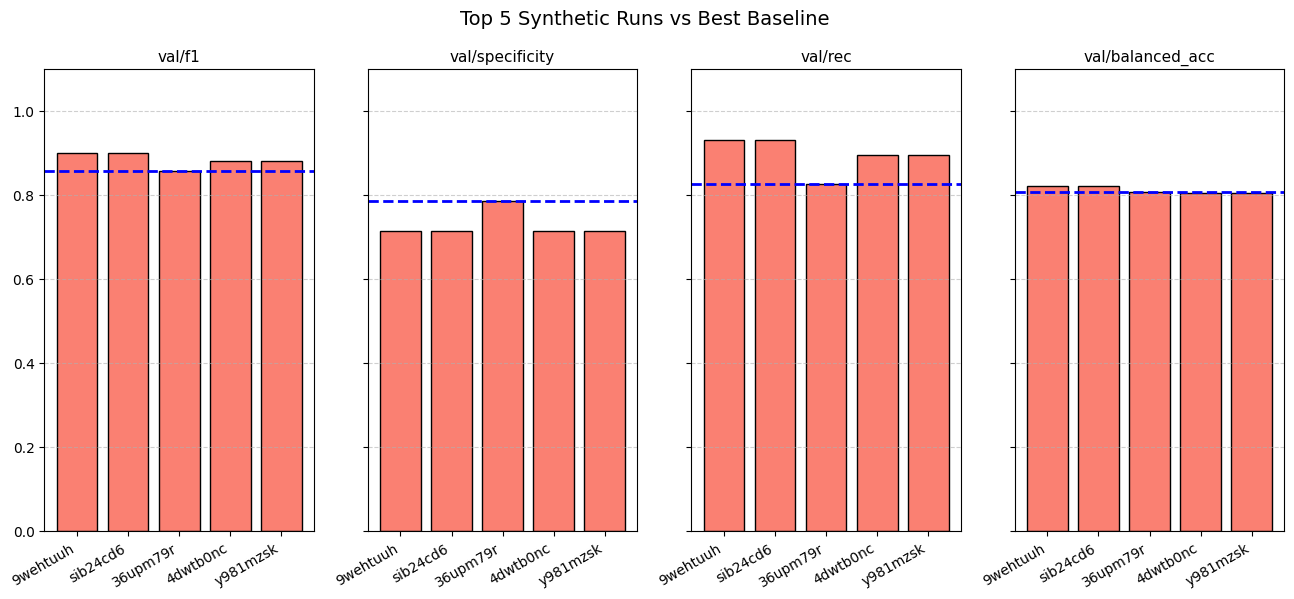

In [16]:
# plot top 5 synthetic runs across all runs vs the best baseline
fig, axes = plt.subplots(
    1, len(metrics), figsize=(4 * len(metrics), 6), sharey=True
)

# add a title to the figure
fig.suptitle('Top 5 Synthetic Runs vs Best Baseline', fontsize=14)

# Get top 5 synthetic runs across all runs
top_5_synth_runs = densenet201_isic2019_runs_df[
    densenet201_isic2019_runs_df['synthetic'] == True
].sort_values(by='val/balanced_acc', ascending=False).head(5)

# Get best baseline run
best_baseline_run = baseline_runs.loc[
    baseline_runs['val/balanced_acc'].idxmax()
]

x = np.arange(len(top_5_synth_runs))
for i, metric in enumerate(metrics):
    ax = axes[i]
    synth_vals = top_5_synth_runs[metric].values
    baseline_val = best_baseline_run[metric]

    ax.bar(
        x,
        synth_vals,
        color='salmon',
        edgecolor='black',
        label='Top 5 Synthetic',
    )
    ax.axhline(
        baseline_val,
        color='blue',
        linestyle='--',
        linewidth=2,
        label='Baseline' if i == 0 else None,
    )

    ax.set_title(metric, fontsize=11)
    ax.set_xticks(x)
    ax.set_xticklabels(
        top_5_synth_runs['run_id'].values, rotation=30, ha='right'
    )
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

Best Baseline Run:
run_id                                                       srhurvh2
run_name            train_isic2019_fb_clean_fc_hsi_crop_aug_minove...
val/f1                                                       0.857143
val/specificity                                              0.785714
val/rec                                                      0.827586
val/balanced_acc                                              0.80665
Name: 143, dtype: object
Best Synthetic Run:
run_id                                                       9wehtuuh
run_name            train_densenet201_hsi_crop_synth_mixed_train_r...
val/f1                                                            0.9
val/specificity                                              0.714286
val/rec                                                      0.931035
val/balanced_acc                                              0.82266
Name: 118, dtype: object


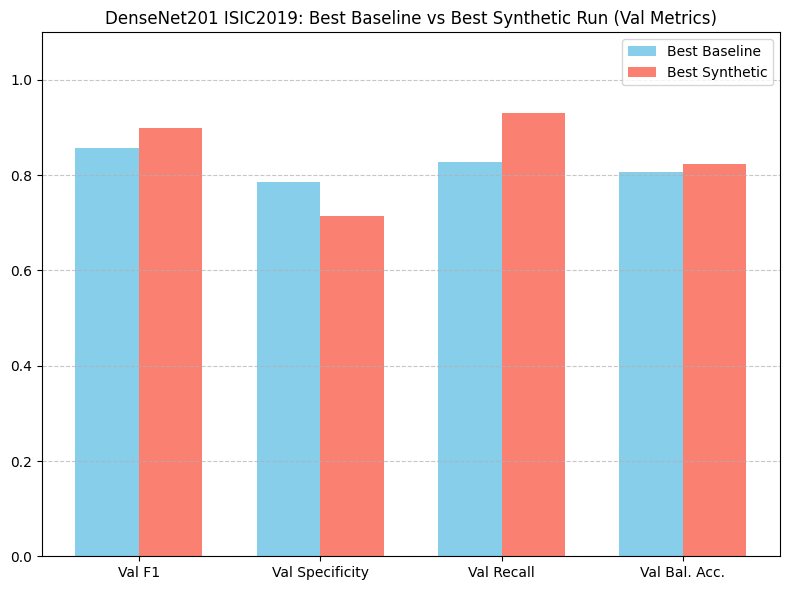

In [17]:
# get best baseline (no synthetic) run based on val/balanced_acc and compare to best synthetic run
baseline_runs = densenet201_isic2019_runs_df[
    densenet201_isic2019_runs_df["synthetic"] == False
]
best_baseline_run = baseline_runs.loc[
    baseline_runs["val/balanced_acc"].idxmax()
]
best_synthetic_run = densenet201_isic2019_runs_df.loc[
    densenet201_isic2019_runs_df["synthetic"] == True
].loc[
    densenet201_isic2019_runs_df["val/balanced_acc"].idxmax()
]
print("Best Baseline Run:")
print(best_baseline_run[["run_id", "run_name", "val/f1", "val/specificity", "val/rec", "val/balanced_acc"]])
print("Best Synthetic Run:")
print(best_synthetic_run[["run_id", "run_name", "val/f1", "val/specificity", "val/rec", "val/balanced_acc"]])

# plot bar chart comparing the two runs on val/f1, val/specificity, val/rec, val/balanced_acc
import matplotlib.pyplot as plt
import numpy as np
metrics = ['Val F1', 'Val Specificity', 'Val Recall', 'Val Bal. Acc.']
baseline_values = best_baseline_run[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].values
synthetic_values = best_synthetic_run[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].values
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, baseline_values, width, label='Best Baseline', color='skyblue')
ax.bar(x + width/2, synthetic_values, width, label='Best Synthetic', color='salmon')
ax.set_title('DenseNet201 ISIC2019: Best Baseline vs Best Synthetic Run (Val Metrics)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

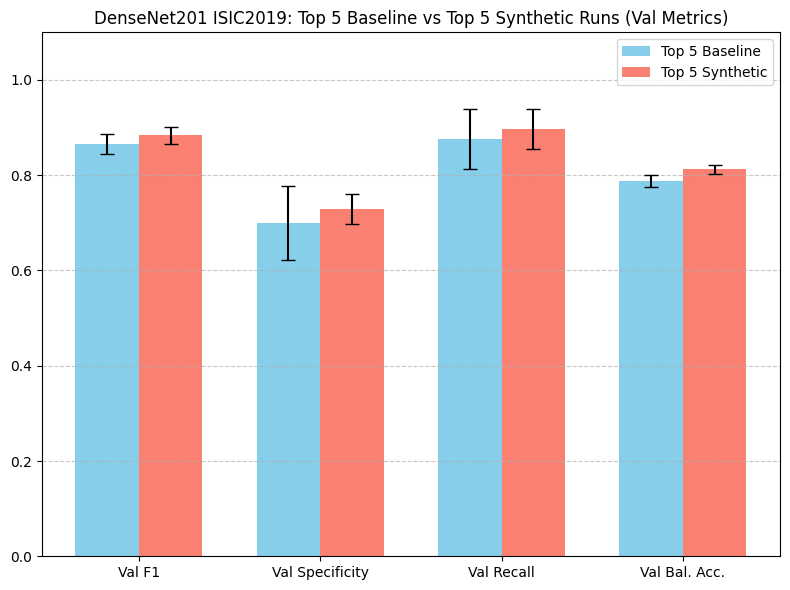

In [18]:
# plot top 5 average metrics across top 5 synthetic runs vs top 5 baseline runs
k = 5

# get non synthetic runs
baseline_runs = densenet201_isic2019_runs_df[
    densenet201_isic2019_runs_df["synthetic"] == False
]
# get top k baseline runs by val/balanced_acc
top_k_baseline_runs = baseline_runs.nlargest(k, "val/balanced_acc")

# get top k synthetic runs by val/balanced_acc
synthetic_runs = densenet201_isic2019_runs_df[
    densenet201_isic2019_runs_df["synthetic"] == True
]
top_k_synthetic_runs = synthetic_runs.nlargest(k, "val/balanced_acc")

# calculate average metrics for both groups
baseline_avg_metrics = top_k_baseline_runs[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].mean().values
synthetic_avg_metrics = top_k_synthetic_runs[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].mean().values

# plot bar chart, with standard deviation error bars
baseline_std_metrics = top_k_baseline_runs[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].std().values
synthetic_std_metrics = top_k_synthetic_runs[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].std().values
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, baseline_avg_metrics, width, yerr=baseline_std_metrics, capsize=5, label='Top 5 Baseline', color='skyblue')
ax.bar(x + width/2, synthetic_avg_metrics, width, yerr=synthetic_std_metrics, capsize=5, label='Top 5 Synthetic', color='salmon')
ax.set_title('DenseNet201 ISIC2019: Top 5 Baseline vs Top 5 Synthetic Runs (Val Metrics)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

,Metric,Best DenseNet201,Best ISIC2019-EffNetB6
0,Val F1,0.9,0.9
1,Val Specificity,0.714286,0.714286
2,Val Recall,0.931035,0.931035
3,Val Bal. Acc.,0.82266,0.82266


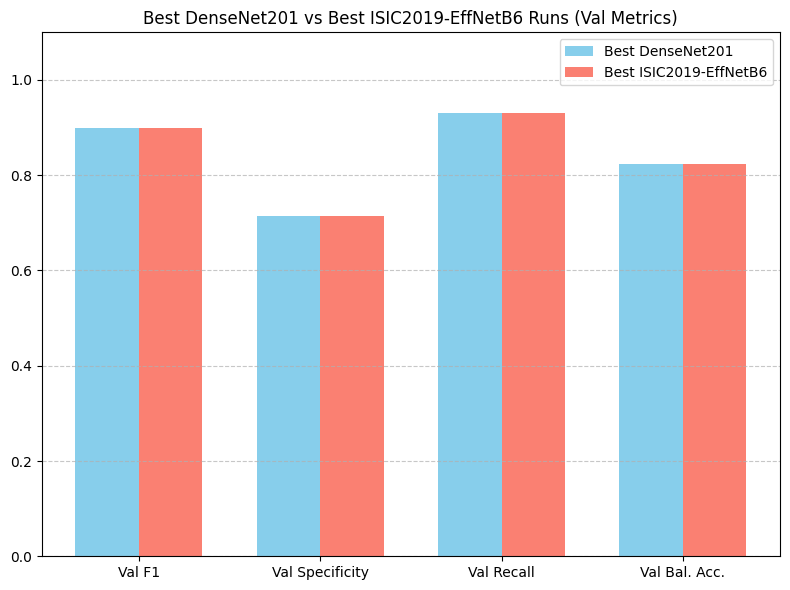

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# get best densenet201 run and best isic2019 run based on val/balanced_acc
dense_runs = densenet201_isic2019_runs_df[
    densenet201_isic2019_runs_df["model_type"] == "densenet201"
]
best_dense_run = dense_runs.loc[
    dense_runs["val/balanced_acc"].idxmax()
]

isic_runs = densenet201_isic2019_runs_df[
    densenet201_isic2019_runs_df["model_type"] == "isic2019"
]
best_isic_run = isic_runs.loc[
    isic_runs["val/balanced_acc"].idxmax()
]

# plot bar chart comparing the two runs on val/f1, val/specificity, val/rec, val/balanced_acc
metrics = ['Val F1', 'Val Specificity', 'Val Recall', 'Val Bal. Acc.']
dense_values = best_dense_run[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].values
isic_values = best_isic_run[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].values
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, dense_values, width, label='Best DenseNet201', color='skyblue')
ax.bar(x + width/2, isic_values, width, label='Best ISIC2019-EffNetB6', color='salmon')
ax.set_title('Best DenseNet201 vs Best ISIC2019-EffNetB6 Runs (Val Metrics)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# concat rows and print table
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Best DenseNet201': dense_values,
    'Best ISIC2019-EffNetB6': isic_values
})
comparison_df

In [20]:
best_dense_run, best_isic_run

(run_id                                                         9wehtuuh
 synthetic_data_dir                    data/hsi_dermoscopy_synth_fastgan
 run_name              train_densenet201_hsi_crop_synth_mixed_train_r...
 best_step                                                           152
 val/f1                                                              0.9
 val/specificity                                                0.714286
 val/rec                                                        0.931035
 synthetic                                                          True
 frozen_backbone                                                   False
 data_augmentation                                                 False
 cropped                                                            True
 model_type                                                  densenet201
 val/balanced_acc                                                0.82266
 gen_model_type                                    

In [21]:
# get best isic2019-effnetb6 run based on val/balanced_acc with and without synthetic data, join them in a table
effnet_runs = densenet201_isic2019_runs_df[
    densenet201_isic2019_runs_df["model_type"] == "isic2019"
]
effnet_base_runs = effnet_runs[
    effnet_runs["synthetic"] == False
]
best_effnet_base_run = effnet_base_runs.loc[
    effnet_base_runs["val/balanced_acc"].idxmax()
]
effnet_synth_runs = effnet_runs[
    effnet_runs["synthetic"] == True
]
best_effnet_synth_run = effnet_synth_runs.loc[
    effnet_synth_runs["val/balanced_acc"].idxmax()
]

densenet_runs = densenet201_isic2019_runs_df[
    densenet201_isic2019_runs_df["model_type"] == "densenet201"
]
densenet_base_runs = densenet_runs[
    densenet_runs["synthetic"] == False
]
best_densenet_base_run = densenet_base_runs.loc[
    densenet_base_runs["val/balanced_acc"].idxmax()
]
densenet_synth_runs = densenet_runs[
    densenet_runs["synthetic"] == True
]
best_densenet_synth_run = densenet_synth_runs.loc[
    densenet_synth_runs["val/balanced_acc"].idxmax()
]

# create comparison table
comparison_effnet_df = pd.DataFrame({
    'Metric': metrics,
    'Best DenseNet201 Baseline': best_densenet_base_run[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].values,
    'Best DenseNet201 Synthetic': best_densenet_synth_run[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].values,
    'Best ISIC2019-EffNetB6 Baseline': best_effnet_base_run[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].values,
    'Best ISIC2019-EffNetB6 Synthetic': best_effnet_synth_run[['val/f1', 'val/specificity', 'val/rec', 'val/balanced_acc']].values
})
comparison_effnet_df

,Metric,Best DenseNet201 Baseline,Best DenseNet201 Synthetic,Best ISIC2019-EffNetB6 Baseline,Best ISIC2019-EffNetB6 Synthetic
0,Val F1,0.885246,0.9,0.857143,0.9
1,Val Specificity,0.642857,0.714286,0.785714,0.714286
2,Val Recall,0.931035,0.931035,0.827586,0.931035
3,Val Bal. Acc.,0.786946,0.82266,0.80665,0.82266


In [22]:
from tabulate import tabulate

# Fix val/balanced_acc computation
densenet201_isic2019_runs_df["val/balanced_acc"] = (
    densenet201_isic2019_runs_df["val/specificity"]
    + densenet201_isic2019_runs_df["val/rec"]
) / 2

# Keep only cropped runs
densenet201_isic2019_runs_df = densenet201_isic2019_runs_df[
    densenet201_isic2019_runs_df["cropped"] == True
]

# Select top 5 models by val/balanced_acc
top5_models = (
    densenet201_isic2019_runs_df.sort_values(
        by="val/balanced_acc", ascending=False
    )
    .head(10)
    .reset_index(drop=True)
)

# Select relevant columns
cols = ["run_name", "val/f1", "val/rec", "val/specificity", "val/balanced_acc"]

# Pretty print as a table
print(
    tabulate(
        top5_models[cols],
        headers="keys",
        tablefmt="fancy_grid",
        floatfmt=".4f",
        showindex=False,
    )
)

╒════════════════════════════════════════════════════════════════════════╤══════════╤═══════════╤═══════════════════╤════════════════════╕
│ run_name                                                               │   val/f1 │   val/rec │   val/specificity │   val/balanced_acc │
╞════════════════════════════════════════════════════════════════════════╪══════════╪═══════════╪═══════════════════╪════════════════════╡
│ train_isic2019_clean_fc_hsi_crop_synth_aug_3200088                     │   0.9000 │    0.9310 │            0.7143 │             0.8227 │
├────────────────────────────────────────────────────────────────────────┼──────────┼───────────┼───────────────────┼────────────────────┤
│ train_densenet201_hsi_crop_synth_mixed_train_r0.7_11985858             │   0.9000 │    0.9310 │            0.7143 │             0.8227 │
├────────────────────────────────────────────────────────────────────────┼──────────┼───────────┼───────────────────┼────────────────────┤
│ train_isic2019_fb_clean_f

In [23]:
synthetic_runs_df_subset = synthetic_runs_df.copy()

# get only first 7 rows
synthetic_runs_df_subset = synthetic_runs_df_subset.head(10)

# remove row 15, 14, 12, 11, 7
# rows_to_remove = [15, 14, 12, 11, 7, 13]
# synthetic_runs_df_subset = synthetic_runs_df_subset.drop(rows_to_remove)

# remove rows 1, 3, 5
rows_to_remove = [1, 3, 5, 7, 8]
synthetic_runs_df_subset = synthetic_runs_df_subset.drop(rows_to_remove)

# add a gen_model_type column based on the "Dataset" column
def get_gen_model_type_from_dataset(dataset):
    if pd.isna(dataset):
        return None
    elif "cyclegan" in dataset and "ac_cyclegan" in dataset:
        return "ac_cyclegan"
    elif "cyclegan" in dataset:
        return "cyclegan"
    elif "vae" in dataset:
        return "vae"
    elif "spade_fastgan" in dataset or "spade_fsgan" in dataset:
        return "spade_fastgan"
    elif "fastgan" in dataset or "fsgan" in dataset:
        return "fastgan"
    else:
        return "fastgan"

# get first 14 columns only
synthetic_runs_df_subset = synthetic_runs_df_subset.iloc[:, :14]
synthetic_runs_df_subset['gen_model_type'] = synthetic_runs_df_subset['Dataset'].apply(get_gen_model_type_from_dataset)
synthetic_runs_df_subset

,Dataset,SAM_mean,SAM_std,RASE_mean,RASE_std,PSNR_mean,PSNR_std,SSIM_mean,SSIM_std,TV_mean,TV_std,FID,Precision,Recall,gen_model_type
0,hsi_dermoscopy_croppedv2_256_synth_fsgan,0.244278,0.043153,4060.050110,772.176355,13.928331,1.239069,0.642179,0.042221,69095.78027,17034.19544,116.870354,0.694915,0.338983,fastgan
2,hsi_dermoscopy_croppedv2_256_synth_spade_fsgan,0.253011,0.031637,4272.189270,448.691614,12.813588,1.959416,0.666892,0.041194,54943.26221,17819.66103,121.256378,0.352941,0.297794,spade_fastgan
4,hsi_dermoscopy_croppedv2_256_synth_ac_cyclegan,0.186673,0.056201,4033.053118,1098.594013,14.510313,1.269291,0.639081,0.028402,170068.16880,65051.00280,124.621574,0.189691,0.519588,ac_cyclegan
6,hsi_dermoscopy_cropped_synth_beta_vae,0.102372,0.112184,5614.508850,1221.136884,12.243149,1.085842,0.410965,0.056497,426366.31640,36672.55946,296.631317,0.170732,0.502439,vae
9,cyclegan_melanoma_i3nz2pqi,0.207840,0.036834,3553.166545,709.678809,15.290147,1.005242,0.657256,0.041688,194534.33720,10462.52031,97.885765,0.498316,0.528620,cyclegan


In [24]:

# copy
densenet201_isic2019_runs_df_with_gen_metrics = densenet201_isic2019_runs_df.copy()

# add the columns in synthetic_runs_df_subset to densenet201_isic2019_runs_df_with_gen_metrics based on gen_model_type
# there is only one row in synthetic_runs_df_subset per gen_model_type. for each one add the columns to all rows in densenet201_isic2019_runs_df_with_gen_metrics that match the gen_model_type
for _, synth_row in synthetic_runs_df_subset.iterrows():
    gen_model_type = synth_row['gen_model_type']
    for col in synthetic_runs_df_subset.columns:
        if col != 'gen_model_type':
            densenet201_isic2019_runs_df_with_gen_metrics.loc[
                densenet201_isic2019_runs_df_with_gen_metrics['gen_model_type'] == gen_model_type,
                col
            ] = synth_row[col]

densenet201_isic2019_runs_df_with_gen_metrics.head()

,run_id,synthetic_data_dir,run_name,best_step,val/f1,val/specificity,val/rec,synthetic,frozen_backbone,data_augmentation,...,RASE_std,PSNR_mean,PSNR_std,SSIM_mean,SSIM_std,TV_mean,TV_std,FID,Precision,Recall
84,klw4lgcf,data/hsi_dermoscopy_croppedv2_256_synth_cyclegan,cyclegan_train_densenet201_pt_fb_hsi_crop_cls_...,78,0.813559,0.571429,0.827586,True,True,True,...,709.678809,15.290147,1.005242,0.657256,0.041688,194534.33720,10462.52031,97.885765,0.498316,0.528620
85,2h8gxe3n,data/hsi_dermoscopy_croppedv2_256_synth_cyclegan,train_densenet201_pt_fb_hsi_crop_cls_synth_aug...,4,0.764706,0.071429,0.896552,True,True,True,...,709.678809,15.290147,1.005242,0.657256,0.041688,194534.33720,10462.52031,97.885765,0.498316,0.528620
86,0mqkwqzl,data/hsi_dermoscopy_croppedv2_256_synth_spade_...,spade_fastgan_train_densenet201_pt_fb_hsi_crop...,24,0.825397,0.428571,0.896552,True,True,True,...,448.691614,12.813588,1.959416,0.666892,0.041194,54943.26221,17819.66103,121.256378,0.352941,0.297794
87,0zhezrp0,data/hsi_dermoscopy_croppedv2_256_synth_fsgan,train_densenet201_pt_fb_hsi_crop_cls_synth_aug...,244,0.830769,0.357143,0.931035,True,True,True,...,772.176355,13.928331,1.239069,0.642179,0.042221,69095.78027,17034.19544,116.870354,0.694915,0.338983
88,crrof3ka,data/hsi_dermoscopy_croppedv2_256_synth_ac_cyc...,ac_cyclegan_train_densenet201_pt_fb_hsi_crop_s...,264,0.848485,0.357143,0.965517,True,True,True,...,1098.594013,14.510313,1.269291,0.639081,0.028402,170068.16880,65051.00280,124.621574,0.189691,0.519588


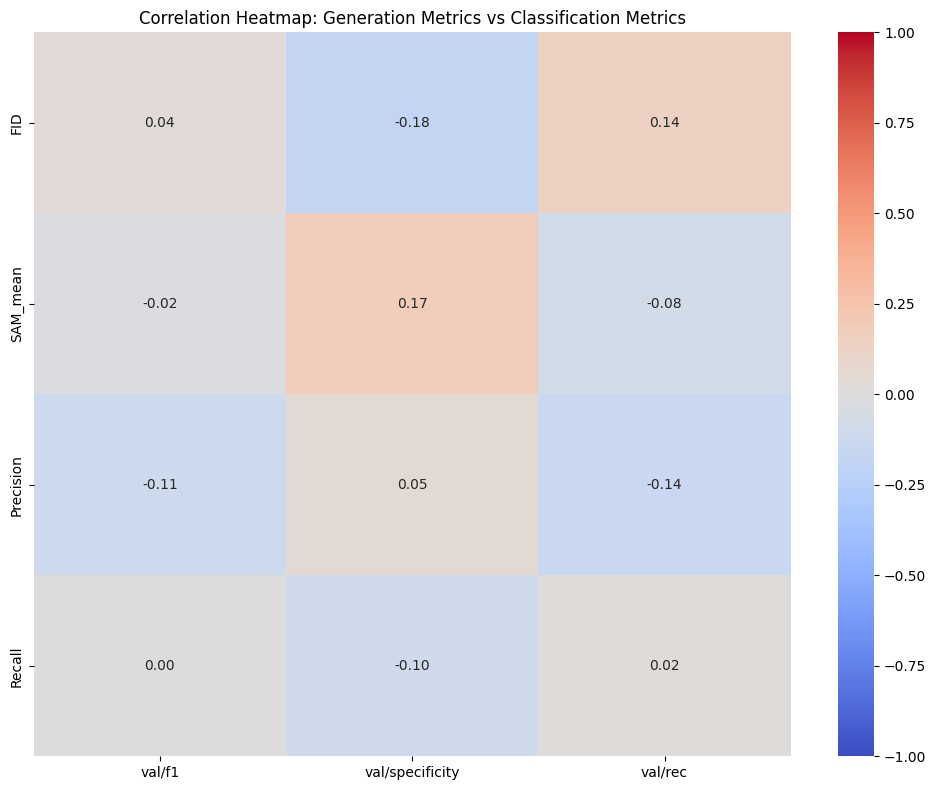

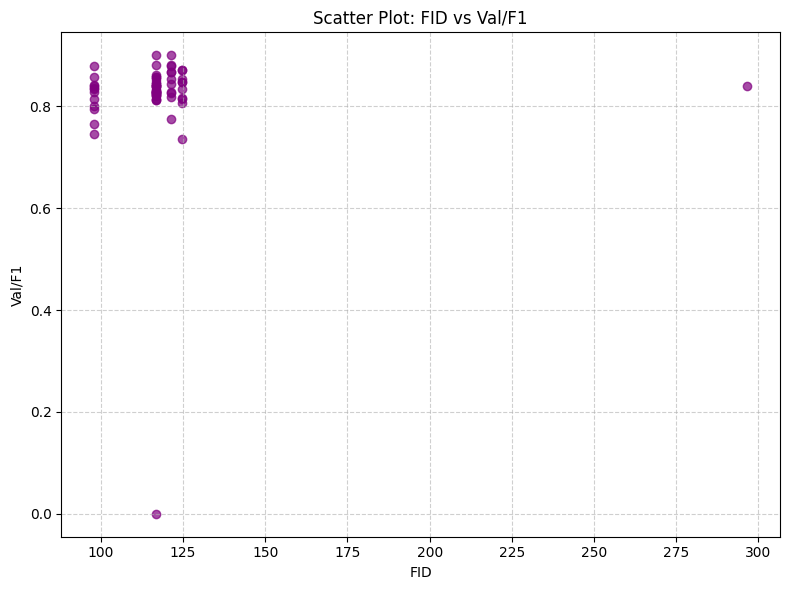

In [44]:
# use densenet201_isic2019_runs_df_with_gen_metrics to compute correlation between gen metrics and class metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for rows with classification results
split = 'val'
synth_runs_clean = densenet201_isic2019_runs_df_with_gen_metrics.dropna(subset=[f'{split}/f1'])

# filter only fastgan and spade_fastgan gen_model_type
# synth_runs_clean = synth_runs_clean[
#     synth_runs_clean['gen_model_type'].isin(['fastgan', 'spade_fastgan'])
# ]

# get only the top 10 best runs by val/balanced_acc
# synth_runs_clean = synth_runs_clean.sort_values(by='val/balanced_acc', ascending=False).head(10)

# get only the top 10 worst runs by val/balanced_acc
# synth_runs_clean = synth_runs_clean.sort_values(by='val/balanced_acc', ascending=True).head(10)

# Define metrics
gen_metrics = ['FID', 'SAM_mean', 'Precision', 'Recall']
class_metrics = [f'{split}/f1', f'{split}/specificity', f'{split}/rec']

# Calculate correlation matrix
# We only want the correlation between gen_metrics and class_metrics,
# not within gen_metrics or within class_metrics for the heatmap (though the full matrix computes it all)
corr_matrix = synth_runs_clean[gen_metrics + class_metrics].corr()

# Slice the matrix to show only Gen vs Class correlations
gen_class_corr = corr_matrix.loc[gen_metrics, class_metrics]

# Plot 1: Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(gen_class_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title('Correlation Heatmap: Generation Metrics vs Classification Metrics')
plt.tight_layout()

# plot a scatter plot of FID vs val/f1
plt.figure(figsize=(8, 6))
plt.scatter(synth_runs_clean['FID'], synth_runs_clean[f'{split}/f1'], color='purple', alpha=0.7)
plt.title('Scatter Plot: FID vs Val/F1')
plt.xlabel('FID')
plt.ylabel('Val/F1')
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
